<a href="https://colab.research.google.com/github/genzj/llm-fine-tune-course/blob/main/Lab_01_Use_LLM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 首先修改会话类型为GPU

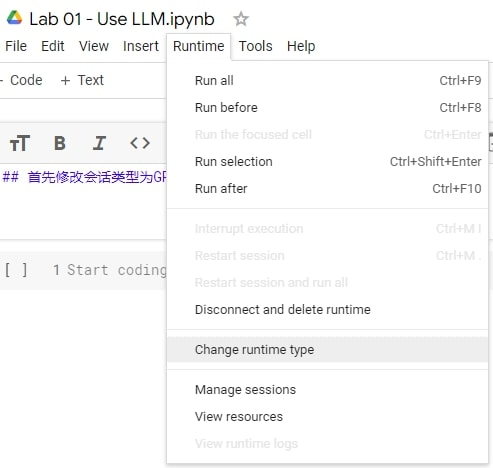

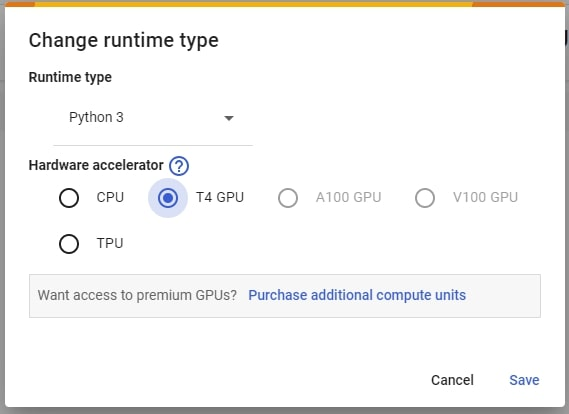

In [ ]:
# 安装依赖库
!pip install transformers==4.31.0 datasets==2.13.0 peft==0.4.0 \
  accelerate==0.21.0 bitsandbytes==0.40.2 trl==0.4.7 mlflow \
  sentencepiece

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.6/485.6 kB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.9/72.9 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.2/244.2 kB 26.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.5/92.5 MB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.4/77.4 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.1/19.1 MB 39.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 24.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.3/150.3 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━

## 数据加载

In [ ]:
from datasets import load_dataset
from IPython.display import display, display_markdown
import pandas as pd
import textwrap

In [ ]:
def print_long_string(s: str, width=70):
  print('\n'.join(textwrap.wrap(s, width=width)))

In [ ]:
rd_ds = load_dataset("xiyuez/red-dot-design-award-product-description")
rd_df = pd.DataFrame(rd_ds['train'])
display(rd_df)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Dataset parquet downloaded and prepared to /root/.cache/huggingface/datasets/xiyuez___parquet/xiyuez--red-dot-design-award-product-description-45eb1fdce1c29838/0.0.0/14a00e99c0d15a23649d0db8944380ac81082d4b021f398733dd84f3a6c569a7. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

,product,category,description,text
0,Biamp Rack Products,Digital Audio Processors,"“High recognition value, uniform aesthetics an...",Product Name: Biamp Rack Products;\n\nProduct ...
1,V33,Video Camera,The V33 livestreaming video camera ensures hig...,Product Name: V33;\n\nProduct Category: Video ...
2,HP LaserJet 5000-6000 and E700-E800 Series MFPs,Multi-Function Printers,The HP LaserJet 5000 to 6000 Series and E700 t...,Product Name: HP LaserJet 5000-6000 and E700-E...
3,Meaco Arete One 20L Dehumidifier,Heating and Air Conditioning Technology,The Meaco Arete One Dehumidifier is characteri...,Product Name: Meaco Arete One 20L Dehumidifier...
4,théATRE Glass Container for Loose Leaf Tea,Food Containers,The design and colouring of the théATRE Glass ...,Product Name: théATRE Glass Container for Loos...
...,...,...,...,...
21178,Pico (S100),Mobile Phone,The Pico (S100) is a very light mobile phone w...,Product Name: Pico (S100);\n\nProduct Category...
21179,PPQ 719 B 21 E,Gas Hob,A refined metallic-coloured glass top emphasis...,Product Name: PPQ 719 B 21 E;\n\nProduct Categ...
21180,i1Pro,Spectral Measurement Device,"This versatile colour-measurement device, whic...",Product Name: i1Pro;\n\nProduct Category: Spec...
21181,787 Dreamliner,Aircraft Interior,The new 787 Dreamliner combines groundbreaking...,Product Name: 787 Dreamliner;\n\nProduct Categ...


In [ ]:
rd_df['instruction'] = 'Create a detailed description for the following product: '+ rd_df['product']+', belonging to category: '+ rd_df['category']
rd_df = rd_df[['instruction', 'description']]
display(rd_df)

,instruction,description
0,Create a detailed description for the followin...,"“High recognition value, uniform aesthetics an..."
1,Create a detailed description for the followin...,The V33 livestreaming video camera ensures hig...
2,Create a detailed description for the followin...,The HP LaserJet 5000 to 6000 Series and E700 t...
3,Create a detailed description for the followin...,The Meaco Arete One Dehumidifier is characteri...
4,Create a detailed description for the followin...,The design and colouring of the théATRE Glass ...
...,...,...
21178,Create a detailed description for the followin...,The Pico (S100) is a very light mobile phone w...
21179,Create a detailed description for the followin...,A refined metallic-coloured glass top emphasis...
21180,Create a detailed description for the followin...,"This versatile colour-measurement device, whic..."
21181,Create a detailed description for the followin...,The new 787 Dreamliner combines groundbreaking...


In [ ]:
rd_df_sample = rd_df.sample(n=5, random_state=42)
display(rd_df_sample)

,instruction,description
18952,Create a detailed description for the followin...,The CG8565 is a gaming PC offering space for h...
12584,Create a detailed description for the followin...,The iSHOXS BullBar ProX mount can be used to a...
5702,Create a detailed description for the followin...,The S81 Pro focuses on two things: outstanding...
20503,Create a detailed description for the followin...,The CenFlex superfinish machine is designed fo...
2480,Create a detailed description for the followin...,The THALION S gas absorption heat pump uses na...


In [ ]:
print('Instruction: ')
print_long_string(rd_df_sample.iloc[0, 0])
print()
print('Expectation: ')
print_long_string(rd_df_sample.iloc[0, 1])

Instruction: 
Create a detailed description for the following product: CG8565,
belonging to category: Desktop Computer

Expectation: 
The CG8565 is a gaming PC offering space for high-quality equipment.
The Windows 7 system works with an Intel Core i7 2600K processor and
supports up to 32 GB of working memory. Two graphics cards, an SSD
hard drive, an efficient water-cooling system and three chassis fans
guarantee excellent performance. At the push of a button, the system
can be overclocked by up to  35 per cent during continuous operation.


## 加载模型

In [ ]:
from transformers import LlamaTokenizer, LlamaForCausalLM

In [ ]:
model_path = 'openlm-research/open_llama_3b_v2'
model = LlamaForCausalLM.from_pretrained(
    model_path, device_map='auto',
)

config.json:   0%|          | 0.00/506 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/6.85G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/137 [00:00<?, ?B/s]

In [ ]:
tokenizer = LlamaTokenizer.from_pretrained(model_path)
tokenizer.add_special_tokens({'pad_token': '[PAD]'})

tokenizer.model:   0%|          | 0.00/512k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/330 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/593 [00:00<?, ?B/s]

You are using the legacy behaviour of the <class 'transformers.models.llama.tokenization_llama.LlamaTokenizer'>. This means that tokens that come after special tokens will not be properly handled. We recommend you to read the related pull request available at https://github.com/huggingface/transformers/pull/24565


1

In [ ]:
test_strings = rd_df_sample['instruction']
predictions = []
for test in test_strings:
  input_ids = tokenizer(test, return_tensors="pt").input_ids.to('cuda')

  generation_output = model.generate(
      input_ids=input_ids, max_new_tokens=156
  )
  predictions.append(tokenizer.decode(generation_output[0]))

In [ ]:
for code in generation_output[0][:30]:
  token = tokenizer.decode(code)
  print('{:8d} {}'.format(code, token))

       1 <s>
    5814 Create
     260 a
    6730 detailed
    5069 description
     334 for
     268 the
    1676 following
    1242 product
   29537 :
    5055 TH
    1483 AL
    2107 ION
     314 S
   29522 ,
   20800 belonging
     290 to
    6116 category
   29537 :
   11143 Gas
   11882 Abs
     270 or
     798 ption
   13031 Heat
   16649 Pump
   29520 .
      13 <0x0A>
    4424 TH
    1483 AL
    2107 ION


In [ ]:
for i in range(len(predictions)):
  display_markdown('## Sample {}'.format(i), raw=True)
  display_markdown('### Instruction: ', raw=True)
  print_long_string(test_strings.iloc[i])
  print()
  display_markdown('### Response: ', raw=True)
  print_long_string(predictions[i])
  print()
  display_markdown('### Truth: ', raw=True)
  print_long_string(rd_df_sample.iloc[i, 1])
  display_markdown('---', raw=True)


## Sample 0

### Instruction: 

Create a detailed description for the following product: CG8565,
belonging to category: Desktop Computer



### Response: 

<s>Create a detailed description for the following product: CG8565,
belonging to category: Desktop Computer. The product is a desktop
computer with a 15.6" screen, a 1.8 GHz Intel Core i5-4570T processor,
8 GB of RAM, a 1 TB hard drive, a DVD burner, a 1920 x 1080 pixel
resolution, a 16:9 aspect ratio, a 1600 x 900 pixel resolution, a 16:9
aspect ratio, a 1920 x 1080 pixel resolution, a 16:9 aspect ratio, a
1920 x 1080 pixel resolution, a 16:9 aspect ratio, a 1920



### Truth: 

The CG8565 is a gaming PC offering space for high-quality equipment.
The Windows 7 system works with an Intel Core i7 2600K processor and
supports up to 32 GB of working memory. Two graphics cards, an SSD
hard drive, an efficient water-cooling system and three chassis fans
guarantee excellent performance. At the push of a button, the system
can be overclocked by up to  35 per cent during continuous operation.


---

## Sample 1

### Instruction: 

Create a detailed description for the following product: iSHOXS
BullBar ProX, belonging to category: Action Cam Mount



### Response: 

<s>Create a detailed description for the following product: iSHOXS
BullBar ProX, belonging to category: Action Cam Mounts. The product is
a Bullbar ProX, which is a mount for the GoPro Hero 4, 3+, 3, 2, 1,
Session, Session+ and Session+ Black Edition. The mount is made of
high quality aluminum and is powder coated. The mount is designed to
be used with the Bullbar ProX. The mount is designed to be used with
the Bullbar ProX. The mount is designed to be used with the Bullbar
ProX. The mount is designed to be used with the Bullbar ProX. The
mount is designed to be used with the Bullbar ProX. The mount is
designed to be used with the Bullbar ProX. The mount is designed to be
used with the Bullbar ProX



### Truth: 

The iSHOXS BullBar ProX mount can be used to attach action cams as
well as system and video cameras. Very resilient and flexible, it
takes up little space, thanks to a design which has its focus on
functionality, and can easily be positioned on bicycle and motorcycle
handlebars. The torsion-resistant aluminium structure is rigidly
bolted for interlocking and allows to take up to 1.75 kg. There are
several vibrationabsorbing two-component inlays to protect painted and
chrome-plated surfaces.


---

## Sample 2

### Instruction: 

Create a detailed description for the following product: S81 Pro,
belonging to category: 4K OLED TV



### Response: 

<s>Create a detailed description for the following product: S81 Pro,
belonging to category: 4K OLED TVs. The product is a 4K OLED TV with a
resolution of 3840 x 2160 pixels. The screen has a diagonal of 55
inches. The product is available in black. The product is equipped
with a built-in sound system. The sound system is Dolby Atmos. The
sound system is equipped with 10 speakers. The sound system is
equipped with a subwoofer. The sound system is equipped with a 100W
amplifier. The sound system is equipped with a 100W amplifier. The
sound system is equipped with a 100W amplifier. The sound system is
equipped with a 100W amplifier. The sound system is



### Truth: 

The S81 Pro focuses on two things: outstanding technology and
minimalist design. It works with 4K resolution and Dolby Vision to
produce brilliant, high-contrast images. For the audio, Dolby Atmos
has been integrated along with CSO technology, which produces sound
directly from the screen through vibrations, giving the impression
that the sound is coming from the pictures themselves. The device is
slim, with a minimalist design. The emphasis is on the materials and
subtle surface textures.


---

## Sample 3

### Instruction: 

Create a detailed description for the following product: CenFlex,
belonging to category: Superfinish Machine



### Response: 

<s>Create a detailed description for the following product: CenFlex,
belonging to category: Superfinish Machine. CenFlex is a high-
performance, low-maintenance, low-cost, and easy-to-use machine for
the production of superfinish parts. CenFlex is a high-performance,
low-maintenance, low-cost, and easy-to-use machine for the production
of superfinish parts. CenFlex is a high-performance, low-maintenance,
low-cost, and easy-to-use machine for the production of superfinish
parts. CenFlex is a high-performance, low-maintenance, low-cost, and
easy-to-use machine for the production of superfinish parts. CenFlex
is a high-performance,



### Truth: 

The CenFlex superfinish machine is designed for the surface treatment
of workpieces and motorsports components. Its curved form gives the
machine a highly distinct appearance. The flush sliding doors
seamlessly fit into the front, which is fashioned from dark real
glass. Outstanding accessibility of the machining area keeps all
working areas in reach for technicians at all times.


---

## Sample 4

### Instruction: 

Create a detailed description for the following product: THALION S,
belonging to category: Gas Absorption Heat Pump



### Response: 

<s>Create a detailed description for the following product: THALION S,
belonging to category: Gas Absorption Heat Pump. THALION S is a gas
absorption heat pump with a capacity of 100 kW. It is a compact and
efficient heat pump with a high COP. The THALION S is a heat pump with
a high efficiency of 3.50. The THALION S is a heat pump with a high
efficiency of 3.50. The THALION S is a heat pump with a high
efficiency of 3.50. The THALION S is a heat pump with a high
efficiency of 3.50. The THALION S is a heat pump with a high
efficiency of 3.50. The THALION S is a heat pump with a high
efficiency of 3.50.



### Truth: 

The THALION S gas absorption heat pump uses natural refrigerants and
combines the benefits of gas heating with the efficiency and
sustainability of a heat pump. It achieves an annual average
efficiency of over 150 per cent and flow temperatures of up to 70
degrees centigrade regardless of the ambient temperature, ensuring low
operating and installation costs. All relevant modules are optimally
designed for servicing and maintenance.


---